In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sentiment-prediction-on-movie-reviews:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F53569%2F5834979%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240912%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240912T105505Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D68047c3cab37bc0dccc59c9c745e4d623a4e5e894abd1d0fc7aed80af0b918aead14187e5ba9dbb09be342fe18dbcf14b88d8e31d126f200da4eb2d78256d9bbd1f386d1deac43fe9b12087e2809feab4319713e82da155662082be4fb8802594be2f548f03cbaa00c8b34d3822d8a4e9c1e99c68f475e37abed0d08715d51aa8e0838dba752fed9630706f274fe9ffe1016279a1a080807dfcd5c9931c7d8c2b954a8a5a527a750357356a99a578f17b6c8471017370d017b2d945bc75d15f09ccf007e8c198ece3a54c1fe696ade4c0c6bfbd34480ecb49615681ccdb1dc21effbf563fdf874cb81e117fabc4fc31e917d720d7d7bcfd6013951e7a351bc5f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv



**Importing  data into train,movies and test**

In [ ]:
train=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
movies=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
test=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

In [ ]:
#Dataframe
file=pd.DataFrame({
    "Name":["Train","Movies","Test"],
    "Shape": [train.shape, movies.shape,test.shape],
    "Type": [type(train),type( movies),type(test)]})
file

,Name,Shape,Type
0,Train,"(162758, 5)",<class 'pandas.core.frame.DataFrame'>
1,Movies,"(143258, 14)",<class 'pandas.core.frame.DataFrame'>
2,Test,"(55315, 4)",<class 'pandas.core.frame.DataFrame'>


In [ ]:
movies=movies.drop_duplicates(subset=['movieid'], keep='first')
print(movies.shape)
df= pd.merge(train, movies,on='movieid',how='left')
df_test=pd.merge(test, movies,on='movieid',how='left')
df.info()

(126404, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  

In [ ]:
for i in df.columns:
    mov_id=i
    uniq=df[i].unique().size
    pos=df[i].where(df['sentiment']=='POSITIVE').unique().size
    neg=df[i].where(df['sentiment']=='NEGATIVE').unique().size
    print(i,':',uniq,':',pos,':',neg)

movieid : 16812 : 15045 : 11543
reviewerName : 4482 : 4296 : 3477
isFrequentReviewer : 2 : 3 : 3
reviewText : 155072 : 103899 : 51183
sentiment : 2 : 2 : 2
title : 16812 : 15045 : 11543
audienceScore : 101 : 99 : 100
rating : 8 : 8 : 8
ratingContents : 4478 : 4140 : 4061
releaseDateTheaters : 4227 : 4009 : 3166
releaseDateStreaming : 2900 : 2802 : 2462
runtimeMinutes : 217 : 216 : 196
genre : 1163 : 1120 : 966
originalLanguage : 92 : 92 : 76
director : 9476 : 8537 : 6669
boxOffice : 3527 : 3413 : 3007
distributor : 1611 : 1498 : 1132
soundType : 438 : 429 : 398


Observations Unique values belonging sentiments across different columns:
    columns[reviewerName,reviewText ,ratingContents,genre,director,boxOffice,distributor]
    have more information than other columns.

In [ ]:
temp = df.groupby('sentiment').count()
temp.style.background_gradient(cmap='Blues')

,movieid,reviewerName,isFrequentReviewer,reviewText,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
sentiment,,,,,,,,,,,,,,,,,
NEGATIVE,53997,53997,53997,51592,53997,49656,35841,35841,42417,49072,52891,53237,53012,53997,38048,40783,28351
POSITIVE,108761,108761,108761,104719,108761,99854,63193,63193,84507,97501,106491,107083,106456,108761,71934,81312,49040


<Axes: title={'center': 'Distribution of data across different attributes'}>

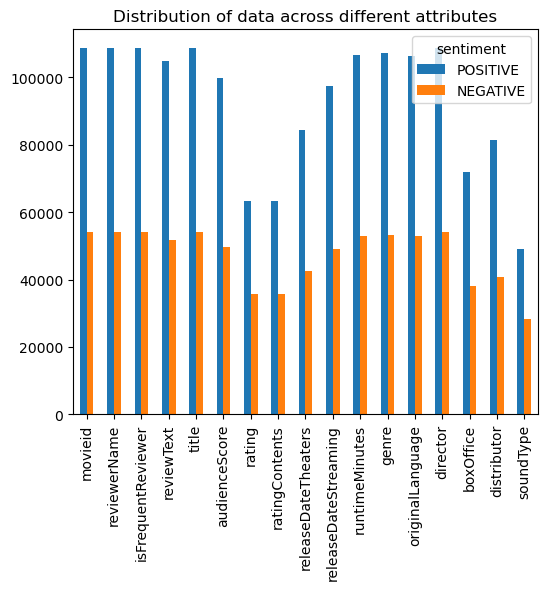

In [ ]:
# plot the dataframe
val=[]
val=np.transpose(temp)
val.plot(y=["POSITIVE", "NEGATIVE"], kind="bar", figsize=(6, 5),
        title='Distribution of data across different attributes')

In [ ]:
words=pd.DataFrame(df, columns = ['sentiment'])
words['Num_words'] = df['reviewText'].apply(lambda x:len(str(x).split()))
t = words.groupby('sentiment').sum()
t

,Num_words
sentiment,
NEGATIVE,1105332
POSITIVE,2314817


In [ ]:
words.describe()

,Num_words
count,162758.000000
mean,21.013707
std,10.216532
min,1.000000
25%,14.000000
50%,21.000000
75%,28.000000
max,54.000000


In [ ]:
X= df.drop([ 'movieid','releaseDateTheaters',
            'releaseDateStreaming', 'runtimeMinutes','originalLanguage',
       'soundType','title', 'sentiment','audienceScore','boxOffice','rating','ratingContents'], axis=1)

In [ ]:
class Pre_Transformer(BaseEstimator, TransformerMixin):
    def fit(self, Xp, y=None):
        return self

    def transform(self,Xp):
        Xp['reviewText']= Xp[Xp.columns[:]].apply(lambda x: ','.join(x.astype(str)),axis=1)
        Xp=Xp.drop([ 'genre','director','reviewerName','isFrequentReviewer','distributor'], axis=1)
        for i in Xp.columns:
            if((i!='audienceScore')):
                Xp[i]=Xp[i].astype (str).str.lower()
        import re
        Xp.replace('https?:\W\W\S+',"",regex=True,inplace=True)
        Xp.replace('[a-zA-Z]+\.(com|com:)',"",regex=True,inplace=True)
        Xp.replace('[^a-zA-Z]'," ",regex=True, inplace=True)
        return Xp

In [ ]:
y=pd.DataFrame(df, columns = ['sentiment'])
#y=y.values.reshape(-1)
y.loc[y["sentiment"] == "POSITIVE", "sentiment"] = 1
y.loc[y["sentiment"] == "NEGATIVE", "sentiment"] = 0
y=y.astype('int')
y=y.values.reshape(-1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate,RandomizedSearchCV,GridSearchCV,cross_val_predict

from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.decomposition import TruncatedSVD



In [ ]:
pipe = Pipeline([('pp', Pre_Transformer()),
                ('imp',SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])
x=pd.DataFrame(pipe.fit_transform(X),columns=["review"])

In [ ]:
x_train_tf,x_test_tf,y_train,y_test=train_test_split( x,y,test_size=0.1, random_state=42)

In [ ]:
tfidf=TfidfVectorizer(analyzer='word',ngram_range=(1,3),lowercase=False)
x_train = tfidf.fit_transform(x_train_tf['review'])
x_test = tfidf.transform(x_test_tf['review'])

In [ ]:
x_train.shape,x_test.shape,x_train_tf.shape,x_test_tf.shape,y_train.shape

((146482, 3533056), (16276, 3533056), (146482, 1), (16276, 1), (146482,))

In [ ]:
def valuate(mod):
    from sklearn.metrics import f1_score
    mod.fit(x_train,y_train)
    y_test_pred=mod.predict(x_test)
    y_train_pred=mod.predict(x_train)
    print("Accuracy in train:",accuracy_score(y_train,y_train_pred))
    print("Accuracy in test:",accuracy_score( y_test,y_test_pred))
    print("F1 in train:",f1_score(y_train,y_train_pred))
    print("F1 score in test:",f1_score(y_test,y_test_pred))
    cm=ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,values_format='.5g')
    cm=ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,values_format='.5g')
    print(plt.show())


In [ ]:
def sm_valuate(mod,val):
    from sklearn.metrics import f1_score
    from sklearn.decomposition import TruncatedSVD
    pipe = Pipeline([('tsvd', TruncatedSVD(n_components=200)),
                      ('smt', SMOTE(sampling_strategy=val))])
    X, y = pipe.fit_resample(x_train, y_train)
    mod.fit(X, y)
    y_test_pred=mod.predict(x_train)
    y_train_pred=mod.predict(X)
    print("Accuracy in train:",accuracy_score(y,y_train_pred))
    print("Accuracy in test:",accuracy_score( y_test,y_test_pred))
    print("F1 in train:",f1_score(y,y_train_pred))
    print("F1 score in test:",f1_score(y_test,y_test_pred))
    cm=ConfusionMatrixDisplay.from_predictions(y,y_train_pred,values_format='.5g')
    cm=ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,values_format='.5g')
    print(plt.show())




**Linear SVC Model**

Accuracy in train: 0.9792397700741388
Accuracy in test: 0.829687884000983
F1 in train: 0.9845575726799543
F1 score in test: 0.8768875466335051


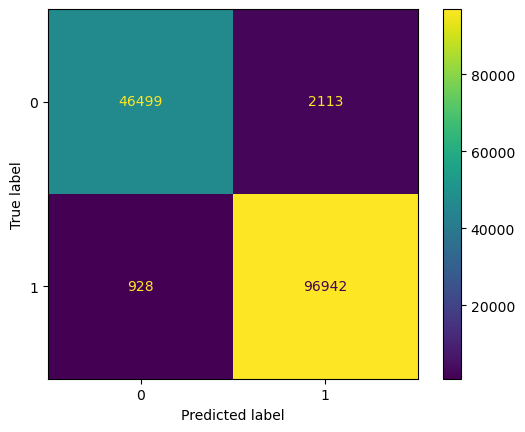

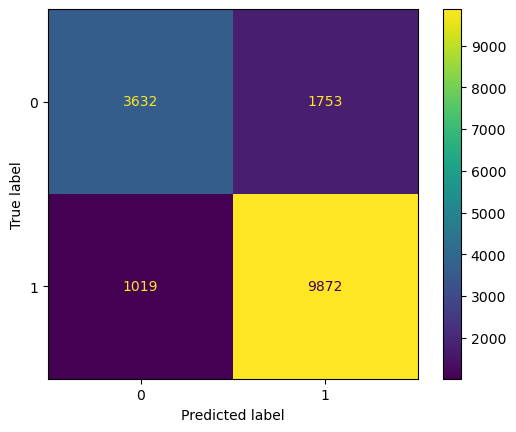

None


'Accuracy in train: 0.9963203670075504\nAccuracy in test: 0.814450724993856\nF1 in train: 0.997248806880535\nF1 score in test: 0.8630509704335207'

In [ ]:
from sklearn.svm import LinearSVC
svc=LinearSVC(loss='squared_hinge', max_iter=10000, penalty='l2', tol=1e-2)


valuate(svc)
'''
loss='squared_hinge',tol=1e-2,C=0.5,penalty='l2'
dist = dict(penalty=['l2', 'l1'],
                     loss=['hinge','squared_hinge'],
                    tol=[1e-2, 1e-4],
                     max_iter=[10000,50000])
clf = GridSearchCV(svc,dist,cv=5)

Accuracy in train: 0.9963203670075504
Accuracy in test: 0.814450724993856
F1 in train: 0.997248806880535
F1 score in test: 0.8630509704335207'''

Best_params for SVC{'loss': 'squared_hinge', 'max_iter': 10000, 'penalty': 'l2', 'tol': 0.0001}

**LOGISTIC REGRESSION**

In [ ]:
'''lr=LogisticRegression(max_iter=100000,tol=1e-2,solver='saga',penalty='l1',C=6)
sm_valuate(lr,0.8)'''

best params for Logistic Rrgression-{'C': 5.995038359600782, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=100, random_state=0)
sm_valuate(rfc,0.6)
Accuracy in train: 0.9999233677327066
Accuracy in test: 0.6880683214549029
F1 in train: 0.9999386929333388
F1 score in test: 0.8008160382910274'''


**NAIVE BAYES**

Accuracy in train: 0.7091929383815077
Accuracy in test: 0.6865937576800196
F1 in train: 0.8210769489247312
F1 score in test: 0.8096854829683244


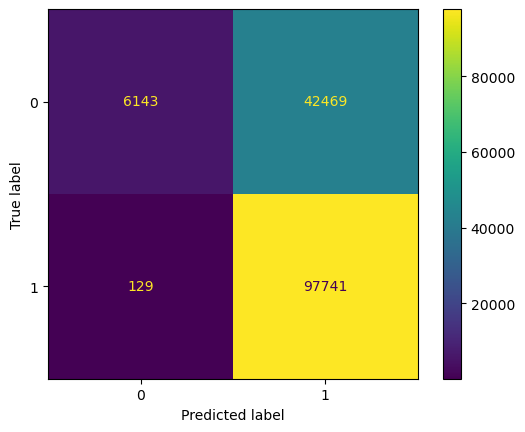

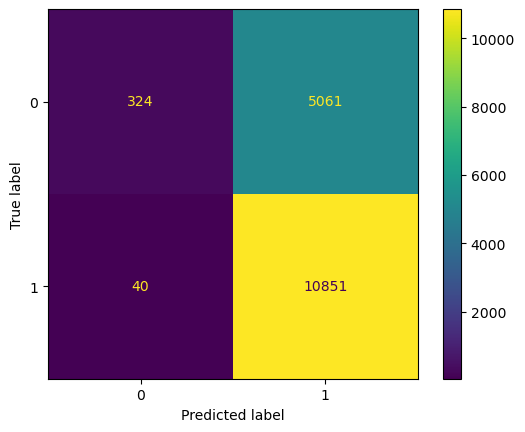

None


In [ ]:
from sklearn.naive_bayes import MultinomialNB
gnb=MultinomialNB()
valuate(gnb)

In [ ]:
'''from lightgbm import LGBMClassifier
lgb=LGBMClassifier(max_bin=255, n_estimators=100)
sm_valuate(lgb,0.6) '''

**BAGGING CLASSIFIER**

In [ ]:
'''from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier( estimator=svc ,n_estimators=20, random_state=0)
valuate(bgc)
Accuracy in train: 0.9867219180513647
Accuracy in test: 0.8304251658884246
F1 in train: 0.9900832598287896
F1 score in test: 0.876377317925289'''

**SGDCLASSIFIER**

In [ ]:
'''from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(max_iter=1000, tol=1e-2)
valuate(sgd)'''



'from sklearn.linear_model import SGDClassifier\nsgd=SGDClassifier(max_iter=1000, tol=1e-2)\nvaluate(sgd)'

In [ ]:
# DUMMY CLASSIFIER
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)

print(dummy_clf.score(X,y))
res=dummy_clf.predict(x_test)
cm=ConfusionMatrixDisplay.from_predictions(y_test,res,values_format='.5g')
plt.show()
acc=accuracy_score(y_test,res)
acc

In [ ]:
df_test.rename(columns = {'isTopCritic':'isFrequentReviewer'}, inplace = True)

In [ ]:
X_test= df_test.drop([ 'movieid','releaseDateTheaters','ratingContents','rating',
            'releaseDateStreaming', 'runtimeMinutes','originalLanguage',
       'soundType','title', 'audienceScore','boxOffice'], axis=1)

In [ ]:
x_test=pd.DataFrame(pipe.fit_transform(X_test),columns=["review"])

In [ ]:
X_test_vec=tfidf.transform(x_test['review'])

In [ ]:
X_test_vec.shape

(55315, 3533056)

In [ ]:
test_pred=svc.predict(X_test_vec)
type(test_pred)

numpy.ndarray

In [ ]:
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range(len(test_pred))]
submission['sentiment']=test_pred

In [ ]:
submission.loc[submission["sentiment"] == 1, "sentiment"] = "POSITIVE"
submission.loc[submission["sentiment"] == 0, "sentiment"] = "NEGATIVE"

In [ ]:
np. count_nonzero(submission=='NEGATIVE'),np. count_nonzero(submission=='POSITIVE')
#(16547, 38768),(15121, 40194),(15079, 40236), (17779, 37536)

(16246, 39069)

In [ ]:
submission.isnull().sum(),submission.shape

(id           0
 sentiment    0
 dtype: int64,
 (55315, 2))

In [ ]:
submission.to_csv('submission.csv',index=False)

In [ ]:
submission.head()

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
